In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import solve_ivp

# Problema del valor inicial(PVI)

La ecuación diferencial ordinaria (EDO) general de primer orden tiene la forma

$$\dfrac{dy}{dx} = f(x,y)$$

cuya solución (analítica) general es

$$F(x,y,c)=0$$

donde $c$ es una constante de integración.

Cuando se utilizan métodos numéricos no es posible encontrar una solución analítica $F(x,y,c)=0$; el propósito es determinar valores de $y(x)$ correspondientes a valores de $x$ en un intervalo dado por la condición inicial $(x_0)$ y un valor final $(x_f)$.

Entonces, el PVI se formula como sigue:

$$\begin{align*} 
\dfrac{dy}{dx}&=f(x,y) \\ 
y(x_0)&=y_0\\
y(x_f)&=? 
\end{align*} 
$$

# Método de Euler (Taylor de primer orden)

**Paso 1**: Dividir el intervalo $[x_0,x_f]$ en $n$ subintervalos de tamaño de paso $h$

$$h=\dfrac{x_f-x_0}{n}$$

 de tal manera que se obtenga un conjunto discreto de $n+1$ puntos:

 $$x_i = x_0 + ih,\,0\leq i \leq n $$

<img src="https://drive.google.com/uc?id=1wl6XD0GN6saVOcwbGe63p75wplkQ9ENn&export=download" width="100%">

**Paso 2**: Evaluar la primera derivada en el punto $P_0 = f(x_0,y_0)$, que no es más que la condición inicial en la formulación del PVI.

$$F'(x)=\dfrac{dy}{dx}|_{f(x_0,y_0)}$$

**Paso 3**: Trazar una recta que pase por $P_0$ y con pendiente de $F'(x)$. Esta recta es la aproximación a $F(x)$.

**Paso 4**: Localizar en la recta (del paso anterior) el valor de $y$ correspondiente a $x_1$.

$$\begin{align*}
\dfrac{y_1-y_0}{x_1-x_0} &= f(x_0,y_0),\,\text{resolviendo para } y_1\\
y_1 & =y_0 + (x_1-x_0)f(x_0,y_0) \\
y_1 &=  y_0 + hf(x_0,y_0)
\end{align*}$$

**Paso 5**: Repetir los **Pasos 2, 3, 4** para generar la sucesión de aproxmaciones

$$\begin{align*}
y_1 &=  y_0 + hf(x_0,y_0)\\
y_2 &=  y_1 + hf(x_1,y_1)\\
&\vdots\\
y_{i+1} &=  y_i + hf(x_i,y_i)\\
&\vdots\\
y_n &=  y_{n-1} + hf(x_{n-1},y_{n-1})\\
\end{align*}$$

**Ejemplo**

Resuelva el siguiente PVI mediante el método de Euler

$$\begin{align*} 
\dfrac{dy}{dx}&=(x-y) \\ 
y(0)&=2\\
y(1)&=? 
\end{align*} 
$$

In [ ]:
# Condiciones iniciales
x0, xf = 0, 1
y0 = 2.0
# Dividir el intervalo [x0,xf] en n subintervalos
n = 5
h = (xf-x0)/n

Aplicamos 

$$\begin{align*}
y_{i+1} &=  y_i + hf(x_i,y_i)\\
x_i &= x_0 +ih,\,0\leq i\leq n
\end{align*}$$

In [ ]:
# Creamos la función
def f(x,y):
  return x-y

In [ ]:
yE = np.zeros(n+1)    # Creamos un arreglo para almacenar las aproximaciones
x = np.zeros_like(yE)
x[0] = x0
yE[0] = y0
# Inicia el proceso iterativo para calcular las aproximaciones de y = F(x)
for i in range(1,n+1): # Creamos un ciclo para realizar los calculos, el ciclo va desde i = 1 hasta n+1
    x[i] = x[i-1] + h
    yE[i] = yE[i-1] + h*f(x[i-1],yE[i-1])  

  


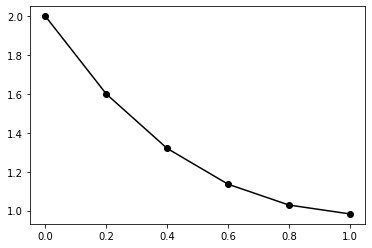

In [ ]:
plt.plot(x,yE,color="black", linestyle="solid", marker = "o")
plt.show()

In [ ]:
yE[-1]

0.9830400000000001

# Metodos de Taylor

El método de Euler utiliza _los primeros dos términos_ de la serie de Taylor sólo para su primera iteración

$$F(x_1)\approx y_1 = F(x_0)+F'(x_0)(x_1-x_0)$$

Como no se dispone de los valores exactos de $F(x_1)$ y $F'(x_1)$, una segunda iteración con 

$$F(x_2)\approx y_2 = F(x_1)+F'(x_1)(x_2-x_1)$$

el lado derecho no es evaluable.

Es por ello que después de la primera iteración se usa la expresión

$$y_{i+1} = y_i + f(x_i,y_i)(x_{i+1},x_i)$$

la cual guarda similitud con $F_i + F'(x_i)(x_{i+1},x_i)$

**Usando tres términos** en la expansión de $F(x_1)$ se llega al método de Taylor de segundo orden

$$F(x_1) \approx y_1 = F(x_0) + F'(x_0)(x_1-x_0) + F''(x_0)\dfrac{(x_1-x_0)^2}{2!}$$

con

$$F''(x) = \dfrac{dF'(x)}{dx}=\dfrac{df(x,y)}{dx}\,\text{y}\, h=x_1-x_0$$

la primera iteración toma la forma

$$y_1 = y_0 + hf(x_0,y_0) + \dfrac{h^2}{2!}\dfrac{df(x,y)}{dx}|_{x_0,y_0}$$

Para obtener $y_1,\,y_2,\ldots,\,y_n$

$$y_{i+1}=y_i + hf(x_i,y_i) + \dfrac{h^2}{2!}\dfrac{df(x,y)}{dx}|_{x_i,y_i}$$






<img src="https://drive.google.com/uc?id=1-YjLNx1e_ZpZWQ5h2tcGGWVtTAM7vQUr&export=download" width="100%">

Este método equivale a usar una curva que pasa por el punto $(x_0,y_0)$, cuya pendiente  y segunda derivada serían iguales que las de la función desconocida $F(x)$ en el punto $(x_0,y_0)$.

> * Si $f(x,y)$ es una función sólo de $x$, la diferenciación respecto a $x$ es relativamente fácil.

> * Si $f(x,y)$ es función de $x$ y de $y$, se usan derivadas totales. La derivada total respecto a $x$ es

$$\dfrac{df(x,y)}{dx} = \dfrac{\partial f(x,y)}{\partial x} + \dfrac{\partial f(x,y)}{\partial y}\dfrac{dy}{dx}$$

**Ejemplo**

Resuelva el siguiente PVI mediante el método de Taylor de segundo orden

$$\begin{align*} 
\dfrac{dy}{dx}&=(x-y) \\ 
y(0)&=2\\
y(1)&=? 
\end{align*} 
$$

Aplicando 

$$\begin{align*}
\dfrac{df(x,y)}{dx} &= \dfrac{\partial f(x,y)}{\partial x} + \dfrac{\partial f(x,y)}{\partial y}\dfrac{dy}{dx}\\
& = 1 - 1(x-y)\\
& = 1- x + y
\end{align*}$$

In [ ]:
# Condiciones iniciales
x0, xf = 0, 1
y0 = 2.0
# Dividir el intervalo [x0,xf] en n subintervalos
n = 5
h = (xf-x0)/n

Aplicamos 

$$\begin{align*}
y_{i+1}&=y_i + hf(x_i,y_i) + \dfrac{h^2}{2!}\dfrac{df(x,y)}{dx}|_{x_i,y_i}
\\
x_i &= x_0 +ih,\,0\leq i\leq n
\end{align*}$$

In [ ]:
# Creamos las funciones
def f(x,y):
  return x-y

def dfxy(x,y):
  return 1.0 - x + y



In [ ]:
yT = np.zeros(n+1)    # Creamos un arreglo yT para almacenar las aproximaciones por el método de Taylor
x = np.zeros_like(yT)
x[0] = x0
yT[0] = y0
for i in range(1,n+1): # Creamos un ciclo para realizar los calculos, el ciclo va desde i = 1 hasta n+1
    x[i] = x[i-1] + h
    yT[i] = yT[i-1] + h*f(x[i-1],yT[i-1]) + 0.5*h**2*dfxy(x[i-1],yT[i-1])

  


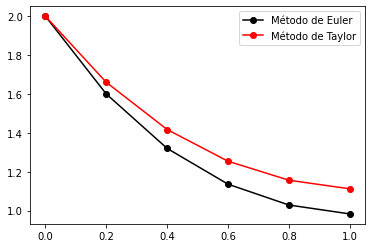

In [ ]:
plt.plot(x,yE,color="black", linestyle="solid", marker = "o")
plt.plot(x,yT,color="red", linestyle="solid", marker = "o")
plt.legend(["Método de Euler", "Método de Taylor"])
plt.show()

In [ ]:
%%html
<marquee style='width: 100%; color: blue;'><b>Solución analítica</b></marquee>

In [ ]:
x = symbols("x")
y = Function("y")
y(x)

y(x)

$$\begin{align*} 
\dfrac{dy}{dx}&=(x-y) \\ 
y(0)&=2\\
y(1)&=? 
\end{align*} 
$$

In [ ]:
# y(x) + dy(x)/dx = x
edo = Eq(y(x)+ y(x).diff(x),x)
edo

Eq(y(x) + Derivative(y(x), x), x)

In [ ]:
sol = dsolve(edo,ics = {y(0):2})
sol

Eq(y(x), ((x - 1)*exp(x) + 3)*exp(-x))

In [ ]:
solA = lambdify(x,sol.rhs, "numpy")

print(solA(0), solA(1))


2.0 1.103638323514327


In [ ]:
x = np.linspace(x0,xf,num= 6,endpoint=True)
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

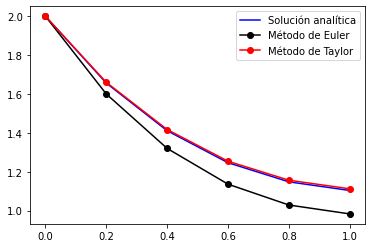

In [ ]:
plt.plot(x,solA(x),color="blue", linestyle="solid")
plt.plot(x,yE,color="black", linestyle="solid", marker = "o")
plt.plot(x,yT,color="red", linestyle="solid", marker = "o")
plt.legend(["Solución analítica", "Método de Euler", "Método de Taylor"])
plt.show()

## Método de Euler modificado (predictor-corrector)

Este método consiste en utilizar un valor promedio de la derivada tomada en los dos extremos del intervalo, en lugar de la derivada tomada en un solo extremo.

Los pasos a seguir son :

> 1. Se parte de $(x_0,y_0)$ y se utiliza el método de Euler a fin de calcular el valor de $y$ correspondiente a $x_1$. Este valor de $y$ se denotará como $\bar{y}$, ya que sólo es un valor transitorio para $y_1$. Esta parte del proceso se conoce como predictor.

> 2. Se trata de corregir (corrector) la predicción evaluando la derivada en el punto $(x_1,y_1)$ usando la ecuación diferencial ordinaria del PVI.

> 3. Se obtiene la media aritmética de esta derivada y la del punto inicial.

$$\dfrac{1}{2}\left[f(x_0,y_0) + f(x_1,\bar{y}_1)\right] = \,\text{derivada promedio}$$

> 4. Se usa la derivada promedio para calcular el nuevo valor de $y_1$

$$y_{1} = y_0 + \dfrac{(x_1-x_0)}{2}\left[f(x_0,y_0) + f(x_1,\bar{y}_1)\right]$$

El esquema iterativo queda de la forma siguiente

$$\bar{y}_{i+1} = y_i + hf(x_i,y_i)$$

Una vez obtenida $\bar{y}_{i+1}$ se calcula $f(x_i,\bar{y}_i)$, la derivada en el punto $(x_{i+1},\bar{y}_{i+1})$ y se promedia con la derivada previa $f(x_i,{y}_i)$ para encontrar la derivada proedio

$$\dfrac{1}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right] $$

Se sustituye 

$$y_{i+1} = y_i + \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]$$




**Ejemplo**

Resuelva el siguiente PVI mediante el método de Euler modificado

$$\begin{align*} 
\dfrac{dy}{dx}&=(x-y) \\ 
y(0)&=2\\
y(1)&=? 
\end{align*} 
$$


In [ ]:
# Condiciones iniciales
x0, xf = 0, 1
y0 = 2.0
# Dividir el intervalo [x0,xf] en n subintervalos
n = 5
h = (xf-x0)/n

Aplicamos 

$$\begin{align*}
\bar{y}_{i+1} &= y_i + hf(x_i,y_i)\\
y_{i+1} &= y_i + \dfrac{h}{2}\left[f(x_i,y_i) + f(x_{i+1},\bar{y}_{i+1})\right]\\
x_i &= x_0 +ih,\,0\leq i\leq n
\end{align*}$$

In [ ]:
# Creamos las funciones
def f(x,y):
  return x-y

In [ ]:
yEM = np.zeros(n+1)    # Creamos un arreglo yEM para almacenar las aproximaciones por el método Euler Modificado
x = np.zeros_like(yEM)
x[0] = x0
yEM[0] = y0

for i in range(1,n+1): # Creamos un ciclo para realizar los calculos, el ciclo va desde i = 0 hasta n+1
    x[i] = x[i-1] + h
    ybar = yEM[i-1] + h*f(x[i-1],yEM[i-1])
    yEM[i] = yEM[i-1] + 0.5*h*(f(x[i-1],yEM[i-1]) + f(x[i],ybar))                               


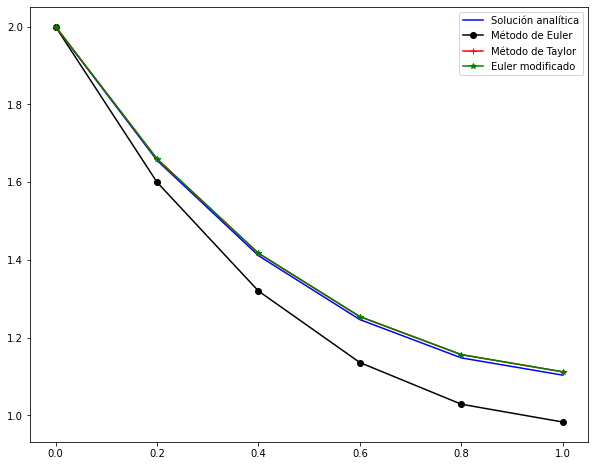

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x,solA(x),color="blue", linestyle="solid")
plt.plot(x,yE,color="black", linestyle="solid", marker = "o")
plt.plot(x,yT,color="red", linestyle="solid", marker = "+")
plt.plot(x,yEM,color="green", linestyle="solid", marker = "*")
plt.legend(["Solución analítica", "Método de Euler",
            "Método de Taylor","Euler modificado"])
plt.show()

## Resolviendo el PVI con [_solve_ivp_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

In [ ]:
#from scipy.integrate import solve_ivp

"""
dy / dt = f(t, y)
y(t0) = y0
"""

def dydt(x,y):
  return x-y

ysol = solve_ivp(dydt,[0, 1],[2])
ysol


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.09222001, 0.95192723, 1.        ])
 t_events: None
        y: array([[2.        , 1.82793351, 1.11039319, 1.1040927 ]])
 y_events: None

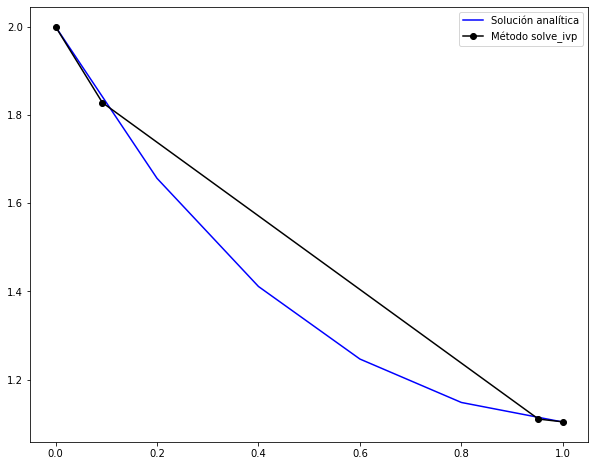

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x,solA(x),color="blue", linestyle="solid")
plt.plot(ysol.t,ysol.y[0][:],color="black", linestyle="solid", marker = "o")
plt.legend(["Solución analítica", "Método solve_ivp"])
plt.show()

In [ ]:
ysol = solve_ivp(dydt,[0, 1],[1,2,4,6], t_eval=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
ysol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])
 t_events: None
        y: array([[1.        , 0.83731294, 0.74009008, 0.6971929 , 0.69876108,
        0.73605775],
       [2.        , 1.65596942, 1.41013512, 1.24578935, 1.14814161,
        1.10408663],
       [4.        , 3.29328236, 2.75022521, 2.34298225, 2.04690269,
        1.84014439],
       [6.        , 4.93059531, 4.09031529, 3.44017515, 2.94566377,
        2.57620214]])
 y_events: None

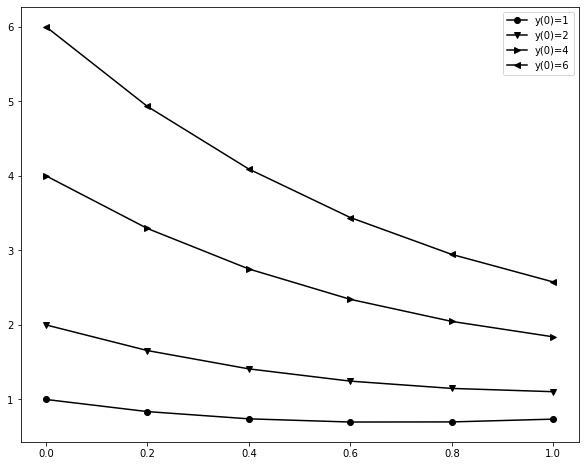

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(ysol.t,ysol.y[0][:],color="black", linestyle="solid", marker = "o")
plt.plot(ysol.t,ysol.y[1][:],color="black", linestyle="solid", marker = "v")
plt.plot(ysol.t,ysol.y[2][:],color="black", linestyle="solid", marker = ">")
plt.plot(ysol.t,ysol.y[3][:],color="black", linestyle="solid", marker = "<")
plt.legend([r"y(0)=1", r"y(0)=2",r"y(0)=4",r"y(0)=6"])
plt.show()